In [0]:
%config InlineBackend.figure_formats = ['svg']

In [0]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler, MinMaxScaler, scale
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, chi2, f_classif, mutual_info_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import *
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import gc

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/UFABC/Mestrado/III Workshop NUVEM/train_features.csv')
data_train = df_train.iloc[:, 1:-1].values.tolist()
target_train = df_train.iloc[:, -1].values.tolist()
train_size = len(target_train)

df_test = pd.read_csv('/content/drive/My Drive/UFABC/Mestrado/III Workshop NUVEM/test_features.csv')
data_test = df_test.iloc[:, 1:-1].values.tolist()
target_test = df_test.iloc[:, -1].values.tolist()
test_size = len(target_test)

In [0]:
data = []
data.extend(data_train)
data.extend(data_test)
data = np.array(data)

target = []
target.extend(target_train)
target.extend(target_test)
target = np.array(target)

In [0]:
X = data
X.shape

(44298, 149)

In [0]:
X = StandardScaler().fit_transform(data)

In [0]:
del data
gc.collect()

1981

In [0]:
# X = VarianceThreshold(threshold=(1)).fit_transform(X)
X.shape

(44298, 70)

In [0]:
X_PCA = PCA(n_components=25).fit_transform(X)

In [0]:
X_train = X_PCA[:train_size, :]
X_test = X_PCA[train_size:, :]

y_train = target[:train_size]
y_test = target[train_size:]

In [0]:
# new_data = np.array([np.append(X_train[idx], y_train[idx]).tolist() for idx in range(len(X_train))])

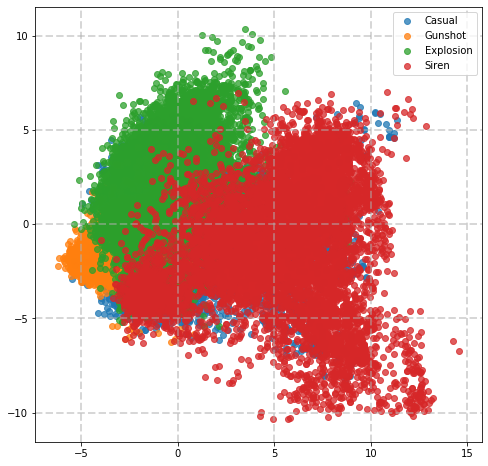

In [0]:
# plt.figure(figsize=(8,8))

# plt.scatter(new_data[new_data[:, 2] == 'casual'][:, 0].astype(float), new_data[new_data[:, 2] == 'casual'][:, 1].astype(float), alpha=0.75, label='Casual')
# plt.scatter(new_data[new_data[:, 2] == 'gunshot'][:, 0].astype(float), new_data[new_data[:, 2] == 'gunshot'][:, 1].astype(float), alpha=0.75, label='Gunshot')
# plt.scatter(new_data[new_data[:, 2] == 'explosion'][:, 0].astype(float), new_data[new_data[:, 2] == 'explosion'][:, 1].astype(float), alpha=0.75, label='Explosion')
# plt.scatter(new_data[new_data[:, 2] == 'siren'][:, 0].astype(float), new_data[new_data[:, 2] == 'siren'][:, 1].astype(float), alpha=0.75, label='Siren')

# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.5, linewidth=2)

# # plt.savefig('FeatureSpace.pdf', format='pdf', dpi=300, transparent=False, bbox_inches='tight')

# plt.show()

In [0]:
X_train = X[:train_size, :]
X_test = X[train_size:, :]

y_train = target[:train_size]
y_test = target[train_size:]

In [0]:
X_train.shape

(36150, 149)

In [0]:
X_test.shape

(8148, 149)

In [0]:
def scores(model):
    score = model.best_score_
    score_std = np.std(model.cv_results_['mean_test_score'])
    print('Score: ', score, ' +- ', score_std)

    time = np.mean(model.cv_results_['mean_score_time'])
    time_std = np.std(model.cv_results_['mean_score_time'])
    print('Time: ', time, ' +- ', time_std)

In [0]:
%%time

# pipeline = Pipeline(
#     [
#         ('feature_selection', SelectFromModel(KNeighborsClassifier(n_neighbors=3))),
#         ('filter', SelectKBest(k=20)),
#         ('classification', KNeighborsClassifier(n_neighbors=3)),
#     ]
# )

grid_params = [
    {
        'n_neighbors': [3,5,7,11,13,17],
     
        'weights': ['uniform', 
                    'distance'],
     
        'metric': ['euclidean', 
                   'manhattan', 
                   'chebyshev', 
                   'minkowski']
    }
]

gs_knn = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_knn_results = gs_knn.fit(X_train, y_train)

In [0]:
gs_knn.best_score_

0.7012171507607192

In [0]:
gs_knn_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
gs_knn_results.cv_results_

In [0]:
scores(gs_knn_results)

Score:  0.7012171507607192  +-  0.0038294271808833346
Time:  21.54617536895805  +-  7.265359779438151


In [0]:
%%time

grid_params_svm = [
    {
        'C': [0.01, 0.1, 1],
        'decision_function_shape': ['ovo', 'ovr'],
        'gamma': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'degree': [2, 3, 4, 5]
    }
]

gs_svm = GridSearchCV(
    SVC(),
    grid_params_svm,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_svm_results = gs_svm.fit(X_train, y_train)

In [0]:
gs_svm_results.best_score_

In [0]:
%%time

grid_params = [
    {
        'max_depth': np.arange(3, 100)
    }
]

gs_tree = GridSearchCV(
    DecisionTreeClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_tree_results = gs_tree.fit(X_train, y_train)

In [0]:
gs_tree_results.best_score_

0.6537759336099586

In [0]:
gs_tree_results.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
scores(gs_tree_results)

Score:  0.6537759336099586  +-  0.011750096908446332
Time:  0.008872854750590636  +-  0.0005302636435157108


In [0]:
%%time

grid_params = [
    {
        'max_depth': np.arange(3, 100)
    }
]

gs_forest = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_forest_results = gs_forest.fit(X_train, y_train)

In [0]:
gs_forest_results.best_score_

0.7096818810511757

In [0]:
gs_forest_results.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=84, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
scores(gs_forest_results)

Score:  0.7096818810511757  +-  0.015159031721373084
Time:  0.031917894828770166  +-  0.0034186485028861757


In [0]:
%%time

grid_params = [
    {
        'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0],
        'n_estimators': [50, 100, 150, 200]
    }
]

gs_adaboost = GridSearchCV(
    AdaBoostClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_adaboost_results = gs_adaboost.fit(X_train, y_train)

In [0]:
gs_adaboost_results.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=200, random_state=None)

In [0]:
gs_adaboost_results.best_score_

0.6546058091286308

In [0]:
scores(gs_adaboost_results)

Score:  0.6546058091286308  +-  0.03000974246486075
Time:  0.5453475832939148  +-  0.23846133156019605


In [0]:
%%time

grid_params = [
    {
        'n_estimators': [50, 100, 150, 200],
        'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]
    }
]

gs_bagging = GridSearchCV(
    BaggingClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_bagging_results = gs_bagging.fit(X_train, y_train)

In [0]:
scores(gs_bagging_results)

Score:  0.7305394190871369  +-  0.011436677868541969
Time:  0.5158747633298238  +-  0.22407693359004605


In [0]:
%%time

grid_params = [
    {
        'learning_rate': [0.05, 0.10],
        'n_estimators': [50, 100, 150],
        'criterion': ['friedman_mse', 'mse']
    }
]

gs_gradientboosting = GridSearchCV(
    GradientBoostingClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_gradientboosting_results = gs_gradientboosting.fit(X_train, y_train)

In [0]:
scores(gs_gradientboosting_results)

Score:  0.7187828492392808  +-  0.008667923183467948
Time:  0.10276322894626194  +-  0.03495174597403588


In [0]:
%%time

grid_params = [
    {
        'C': [0.001, 0.01, 0.1, 1.0, 10.0]
    }
]

gs_passive = GridSearchCV(
    PassiveAggressiveClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_passive_results = gs_passive.fit(X_train, y_train)

In [0]:
scores(gs_passive_results)

Score:  0.6940248962655602  +-  0.03254671862846051
Time:  0.006967401504516602  +-  0.0007441717240127682


In [0]:
%%time

grid_params = [
    {
        'C': [0.001, 0.01, 0.1, 1.0, 10.0],
        'kernel': ['linear', 'poly'],
        'degree': [2, 3, 4, 5]
    }
]

gs_svm = GridSearchCV(
    SVC(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_svm_results = gs_svm.fit(X_train, y_train)

In [0]:
scores(gs_svm_results)

Score:  0.7174827109266944  +-  0.017224300241461918
Time:  6.093752106030783  +-  1.9789945350637446


In [0]:
print (confusion_matrix(y_test, gs_svm_results.best_estimator_.predict(X_test)))

[[2341  104   59  107]
 [ 335 1779   16    7]
 [ 145   14 1337    0]
 [ 354  140   10 1400]]


In [0]:
%%time

grid_params = [
    {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 10000.0],
        'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'normalize': [False, True],
        'tol': [0.01, 0.001, 0.0001]
    }
]

gs_ridge = GridSearchCV(
    RidgeClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_ridge_results = gs_ridge.fit(X_train, y_train)

In [0]:
scores(gs_ridge_results)

Score:  0.695076071922545  +-  0.13703534247111054
Time:  0.00716415631077277  +-  0.0009912598156948471


In [0]:
%%time

grid_params = [
    {
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['none', 'l2', 'l1', 'elasticnet'],
        'alpha': [0.00001, 0.0001, 0.001],
        'tol': [0.01, 0.001, 0.0001]
    }
]

gs_sgd = GridSearchCV(
    SGDClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_sgd_results = gs_sgd.fit(X_train, y_train)

In [0]:
scores(gs_sgd_results)

Score:  0.7213278008298755  +-  0.02782100653183822
Time:  0.006813290825596562  +-  0.00015618162615797874


In [0]:
%%time

grid_params = [
    {
        'penalty': ['none', 'l2', 'l1', 'elasticnet'],
        'alpha': [0.00001, 0.00001, 0.0001, 0.001, 0.01],
        'tol': [0.01, 0.001, 0.0001, 0.00001]
    }
]

gs_perceptron = GridSearchCV(
    Perceptron(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_perceptron_results = gs_perceptron.fit(X_train, y_train)

In [0]:
scores(gs_perceptron_results)

Score:  0.6819917012448132  +-  0.02813772908054496
Time:  0.006927621364593506  +-  0.0002635035910960686


In [0]:
np.max(gs_perceptron_results.cv_results_['split0_test_score'])

0.7074344507135745

In [0]:
%%time

grid_params = [
    {
        'hidden_layer_sizes': [(50, 1), (50, 5), (50, 10), (100, 5), (100, 10)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    }
]

gs_mlp = GridSearchCV(
    MLPClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_mlp_results = gs_mlp.fit(X_train, y_train)

In [0]:
scores(gs_mlp_results)

Score:  0.7277731673582296  +-  0.09196380029453866
Time:  0.04337662723329332  +-  0.023533520089462415


In [0]:
%%time

grid_params = [
    {
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['none', 'l2', 'l1', 'elasticnet'],
        'alpha': [0.00001, 0.0001, 0.001],
        'tol': [0.01, 0.001, 0.0001]
    }
]

gs_sgd = GridSearchCV(
    SGDClassifier(),
    grid_params,
    verbose=100,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

gs_sgd_results = gs_sgd.fit(X_train, y_train)

In [0]:
scores(gs_sgd_results)

Score:  0.7083264177040111  +-  0.01625743087541599
Time:  0.012532836861080594  +-  0.0005106230455869537
